<a href="https://colab.research.google.com/github/decile-team/submodlib/blob/master/tutorials/Modelling_Capabilities_of_CG_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init

In [3]:
!pip install -i https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ submodlib

Looking in indexes: https://test.pypi.org/simple/, https://pypi.org/simple/
     |████████████████████████████████| 79 kB 3.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for submodlib: filename=submodlib-1.1.2-cp37-cp37m-linux_x86_64.whl size=491418 sha256=a4d40120f6eb911d8e62f3ad6834f7745f5fc475174cbc62052e5fe859767e11
  Stored in directory: /root/.cache/pip/wheels/51/db/2f/0d54fe93a7db2761f759121f23afe30dd9511994695fba8c4e
Successfully built submodlib


# Hand-crafted Data with Private Instances

To carefully observe the characteristics of the optimal set obtained by the maximization of these functions, we begin by creating a controlled dataset of 46 2D points along with some private instances as below. Specifically we have some clusters and some outliers in this dataset. Please note that there is no overlap between the ground set and the private set.

Number of elements in ground set =  46


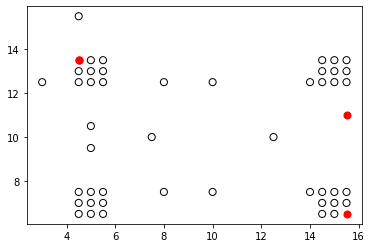

In [5]:
import numpy as np
import matplotlib.pyplot as plt
groundData =np.array( [(3,12.5), (5,13.5), (5.5,13.5), (14.5,13.5), (15,13.5), (15.5,13.5),
(4.5,13), (5,13), (5.5,13), (14.5,13), (15,13), (15.5,13),
(4.5,12.5), (5,12.5), (5.5,12.5), (14.5,12.5), (15,12.5), (15.5,12.5),
(4.5,7.5), (5,7.5), (5.5,7.5), (14.5,7.5), (15,7.5), (15.5,7.5),
(4.5,7), (5,7), (5.5,7), (14.5,7), (15,7), (15.5,7),
(4.5,6.5), (5,6.5), (5.5,6.5), (14.5,6.5), (15,6.5), (7.5,10), (12.5,10), (10,12.5), 
(10,7.5), (8,12.5), (8,7.5), (14,12.5), (14,7.5), (4.5, 15.5), (5,9.5), (5,10.5)] )
print("Number of elements in ground set = ", len(groundData))
groundxs = [x[0] for x in groundData]
groundys = [x[1] for x in groundData]

mutlipleQueryData = np.array([(4.5,13.5), (15.5,6.5)])
multiplequeryxs = [x[0] for x in mutlipleQueryData]
multiplequeryys = [x[1] for x in mutlipleQueryData]

mutlipleQueryData2 = np.array([(4.5,13.5), (15.5,11)])
multiplequeryxs2 = [x[0] for x in mutlipleQueryData2]
multiplequeryys2 = [x[1] for x in mutlipleQueryData2]

singleQueryData = np.array([(4.5,13.5)])
singlequeryxs = [x[0] for x in singleQueryData]
singlequeryys = [x[1] for x in singleQueryData]

plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='red', label="Privates")
plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='red', label="Privates")

In [7]:
def printGreedyRounded(greedyList):
  print([(elem[0], round(elem[1],3)) for elem in greedyList])

# Selection by GraphCutConditionalGain Functions (GCCG)

## $\lambda=0$

### Single Private

[(25, 8.494), (7, 8.402), (19, 8.383), (10, 8.38), (13, 8.364), (26, 8.19), (9, 8.169), (16, 8.159), (20, 8.137), (8, 8.137)]
[(25, 8.494), (7, 8.402), (19, 8.383), (10, 8.38), (13, 8.364), (26, 8.19), (9, 8.169), (16, 8.159), (20, 8.137), (8, 8.137)]
[(25, 8.494), (7, 8.402), (19, 8.383), (10, 8.38), (13, 8.364), (26, 8.19), (9, 8.169), (16, 8.159), (20, 8.137), (8, 8.137)]


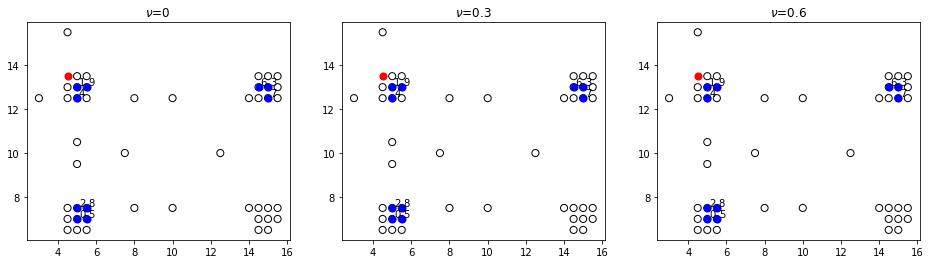

In [10]:
from submodlib import GraphCutConditionalGainFunction

nus = [0, 0.3, 0.6]
row = 0
index = 1
plt.figure(figsize = (16, 4))
for nu in nus:
    plt.subplot(1,3,row*3+index)
    obj = GraphCutConditionalGainFunction(n=46, 
                                          num_privates=1, 
                                          lambdaVal=0, 
                                          data=groundData,
                                          privateData=singleQueryData,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(singlequeryxs, singlequeryys, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

### Multiple Privates (1)

[(25, 8.494), (7, 8.402), (19, 8.383), (10, 8.38), (13, 8.364), (26, 8.19), (9, 8.169), (16, 8.159), (20, 8.137), (8, 8.137)]
[(25, 8.494), (7, 8.402), (19, 8.383), (10, 8.38), (13, 8.364), (26, 8.19), (9, 8.169), (16, 8.159), (20, 8.137), (8, 8.137)]
[(25, 8.494), (7, 8.402), (19, 8.383), (10, 8.38), (13, 8.364), (26, 8.19), (9, 8.169), (16, 8.159), (20, 8.137), (8, 8.137)]


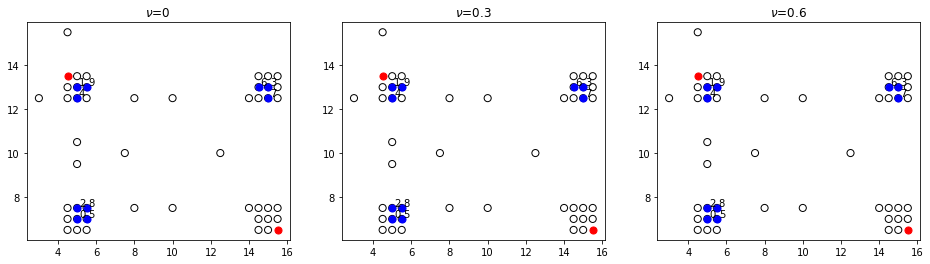

In [11]:
from submodlib import GraphCutConditionalGainFunction

nus = [0, 0.3, 0.6]
row = 0
index = 1
plt.figure(figsize = (16, 4))
for nu in nus:
    plt.subplot(1,3,row*3+index)
    obj = GraphCutConditionalGainFunction(n=46, 
                                          num_privates=2, 
                                          lambdaVal=0, 
                                          data=groundData,
                                          privateData=mutlipleQueryData,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

### Multiple Privates (2)

[(25, 8.494), (7, 8.402), (19, 8.383), (10, 8.38), (13, 8.364), (26, 8.19), (9, 8.169), (16, 8.159), (20, 8.137), (8, 8.137)]
[(25, 8.494), (7, 8.402), (19, 8.383), (10, 8.38), (13, 8.364), (26, 8.19), (9, 8.169), (16, 8.159), (20, 8.137), (8, 8.137)]
[(25, 8.494), (7, 8.402), (19, 8.383), (10, 8.38), (13, 8.364), (26, 8.19), (9, 8.169), (16, 8.159), (20, 8.137), (8, 8.137)]


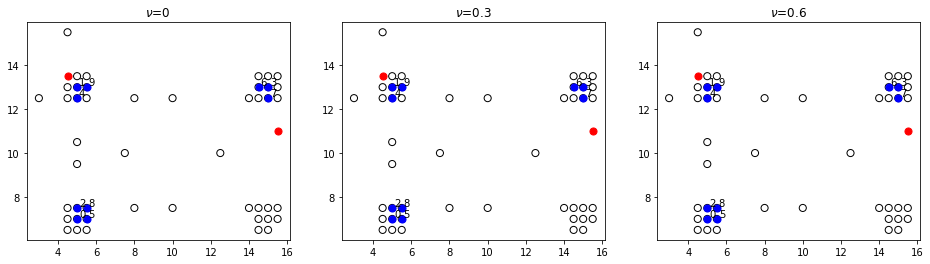

In [12]:
from submodlib import GraphCutConditionalGainFunction

nus = [0, 0.3, 0.6]
row = 0
index = 1
plt.figure(figsize = (16, 4))
for nu in nus:
    plt.subplot(1,3,row*3+index)
    obj = GraphCutConditionalGainFunction(n=46, 
                                          num_privates=2, 
                                          lambdaVal=0, 
                                          data=groundData,
                                          privateData=mutlipleQueryData2,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

## $\lambda=1$

### Single Private

[(25, 7.494), (10, 7.374), (7, 7.289), (28, 6.596), (19, 5.678), (13, 5.494), (15, 5.47), (21, 4.859), (26, 3.946), (4, 3.801)]
[(25, 7.471), (10, 7.371), (13, 6.88), (28, 6.594), (19, 5.612), (15, 5.483), (7, 5.159), (21, 4.857), (26, 3.924), (4, 3.798)]
[(25, 7.448), (10, 7.368), (28, 6.6), (13, 6.53), (19, 5.582), (15, 5.479), (21, 4.863), (8, 4.764), (26, 3.9), (4, 3.791)]
[(25, 7.418), (10, 7.364), (28, 6.598), (13, 6.073), (19, 5.543), (15, 5.474), (21, 4.861), (8, 4.307), (26, 3.871), (4, 3.787)]
[(25, 7.387), (10, 7.36), (28, 6.596), (19, 5.668), (15, 5.486), (13, 5.434), (21, 4.859), (26, 3.94), (4, 3.8), (8, 3.733)]
[(10, 7.362), (25, 7.35), (28, 6.595), (19, 5.628), (15, 5.48), (14, 4.998), (21, 4.854), (26, 3.909), (4, 3.792), (13, 3.27)]
[(10, 7.357), (25, 7.32), (28, 6.593), (19, 5.589), (15, 5.475), (21, 4.863), (14, 4.592), (26, 3.879), (4, 3.788), (27, 3.136)]
[(10, 7.353), (25, 7.289), (28, 6.591), (19, 5.549), (15, 5.47), (21, 4.861), (14, 4.197), (26, 3.849), (4, 3.

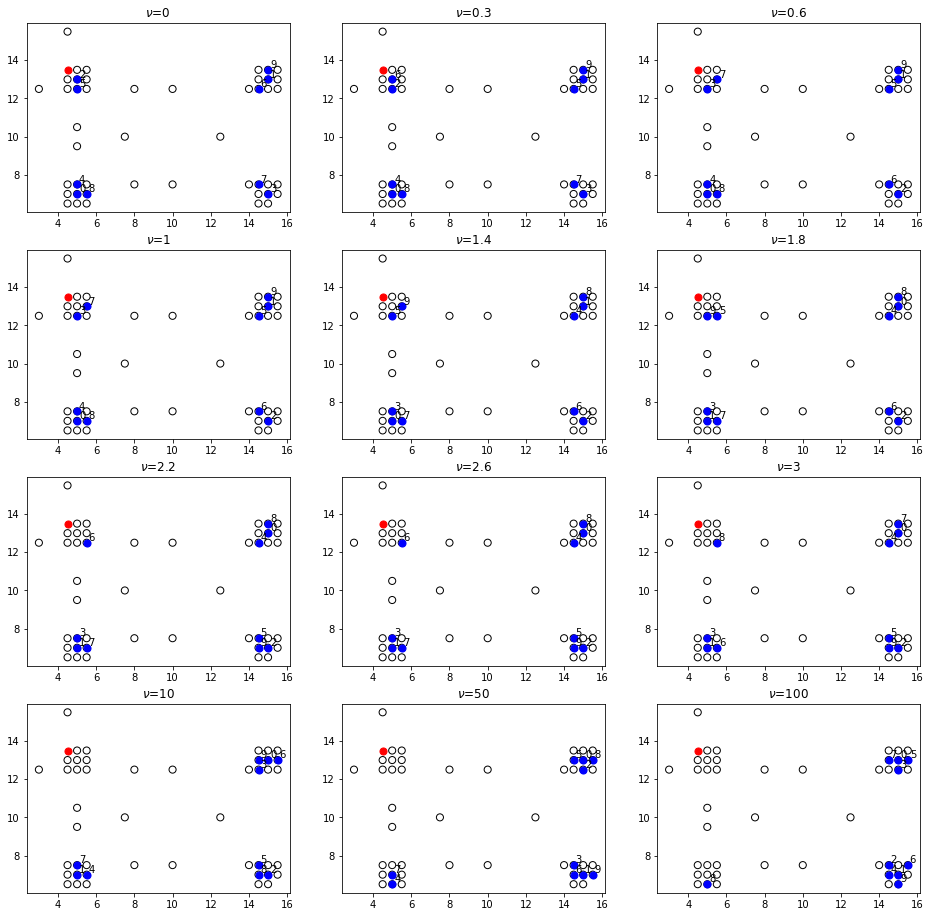

In [13]:
from submodlib import GraphCutConditionalGainFunction

nus = [0, 0.3, 0.6, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for nu in nus:
    plt.subplot(4,3,row*3+index)
    obj = GraphCutConditionalGainFunction(n=46, 
                                          num_privates=1, 
                                          lambdaVal=1, 
                                          data=groundData,
                                          privateData=singleQueryData,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(singlequeryxs, singlequeryys, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

### Multiple Privates (1)

[(25, 7.494), (10, 7.374), (7, 7.289), (28, 6.596), (19, 5.678), (13, 5.494), (15, 5.47), (21, 4.859), (26, 3.946), (4, 3.801)]
[(25, 7.468), (10, 7.348), (13, 6.878), (28, 6.173), (19, 5.609), (15, 5.454), (7, 5.158), (21, 4.561), (26, 3.92), (4, 3.78)]
[(25, 7.442), (10, 7.322), (13, 6.534), (21, 5.858), (19, 5.572), (9, 5.398), (8, 4.768), (28, 4.227), (26, 3.894), (16, 3.789)]
[(25, 7.407), (10, 7.287), (13, 6.075), (19, 5.546), (15, 5.505), (21, 5.279), (8, 4.309), (26, 3.874), (4, 3.804), (27, 3.549)]
[(25, 7.372), (10, 7.252), (19, 5.667), (15, 5.478), (13, 5.434), (21, 4.883), (26, 3.939), (4, 3.794), (8, 3.733), (27, 3.09)]
[(25, 7.337), (10, 7.217), (19, 5.623), (9, 5.437), (14, 4.996), (21, 4.52), (26, 3.903), (16, 3.799), (13, 3.268), (27, 2.608)]
[(25, 7.302), (10, 7.182), (19, 5.58), (9, 5.402), (14, 4.599), (21, 4.123), (26, 3.868), (16, 3.756), (45, 2.821), (4, 2.249)]
[(25, 7.268), (10, 7.148), (19, 5.536), (9, 5.367), (14, 4.202), (16, 3.883), (26, 3.847), (21, 3.542)

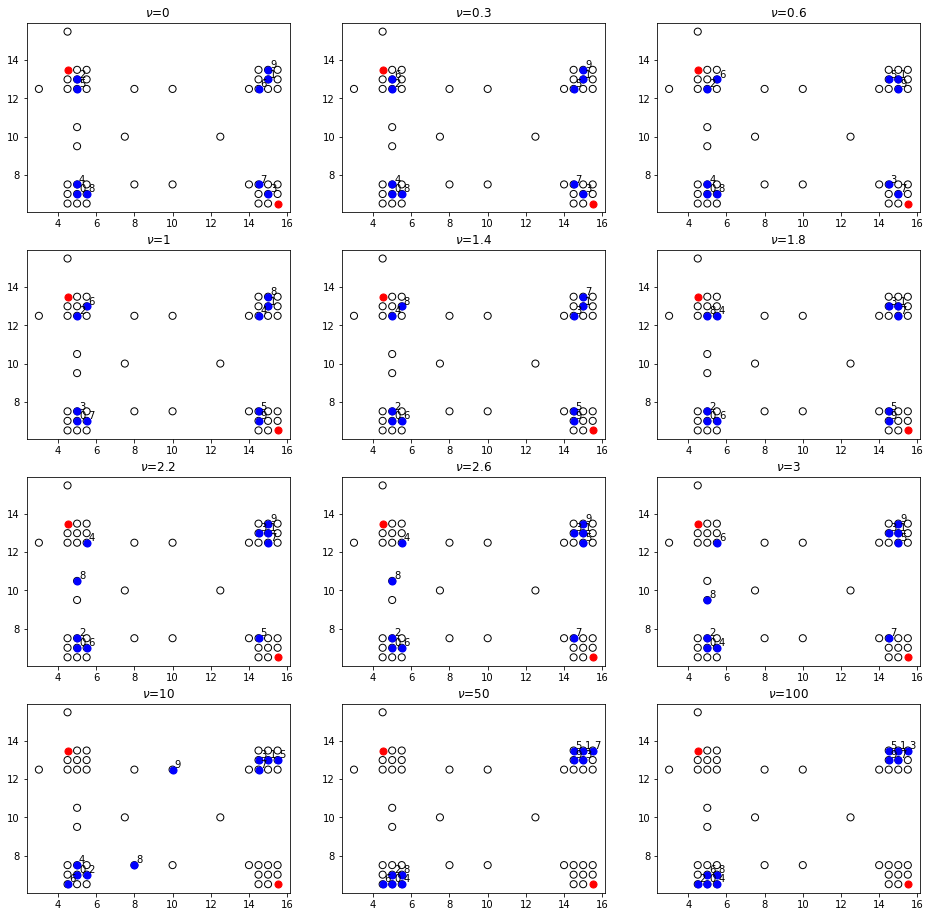

In [14]:
from submodlib import GraphCutConditionalGainFunction

nus = [0, 0.3, 0.6, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for nu in nus:
    plt.subplot(4,3,row*3+index)
    obj = GraphCutConditionalGainFunction(n=46, 
                                          num_privates=2, 
                                          lambdaVal=1, 
                                          data=groundData,
                                          privateData=mutlipleQueryData,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

### Multiple Privates (2)

[(25, 7.494), (10, 7.374), (7, 7.289), (28, 6.596), (19, 5.678), (13, 5.494), (15, 5.47), (21, 4.859), (26, 3.946), (4, 3.801)]
[(25, 7.469), (10, 7.157), (13, 6.877), (28, 6.514), (19, 5.61), (9, 5.28), (7, 5.156), (21, 4.796), (26, 3.922), (16, 3.582)]
[(25, 7.444), (10, 6.94), (13, 6.531), (28, 6.433), (19, 5.578), (9, 5.08), (8, 4.767), (21, 4.695), (26, 3.896), (16, 3.303)]
[(25, 7.41), (10, 6.651), (28, 6.331), (13, 6.063), (19, 5.535), (9, 4.813), (27, 4.575), (8, 4.296), (26, 3.862), (22, 3.013)]
[(25, 7.377), (10, 6.361), (28, 6.223), (19, 5.657), (13, 5.437), (27, 4.57), (9, 4.446), (26, 3.929), (8, 3.734), (22, 2.875)]
[(25, 7.343), (28, 6.215), (10, 5.972), (19, 5.614), (14, 4.997), (27, 4.465), (9, 4.175), (26, 3.894), (13, 3.266), (22, 2.735)]
[(25, 7.309), (28, 6.106), (10, 5.682), (19, 5.571), (14, 4.597), (27, 4.361), (9, 3.908), (26, 3.86), (45, 2.817), (22, 2.593)]
[(25, 7.276), (28, 5.998), (19, 5.536), (10, 5.386), (27, 4.267), (14, 4.188), (26, 3.835), (9, 3.632),

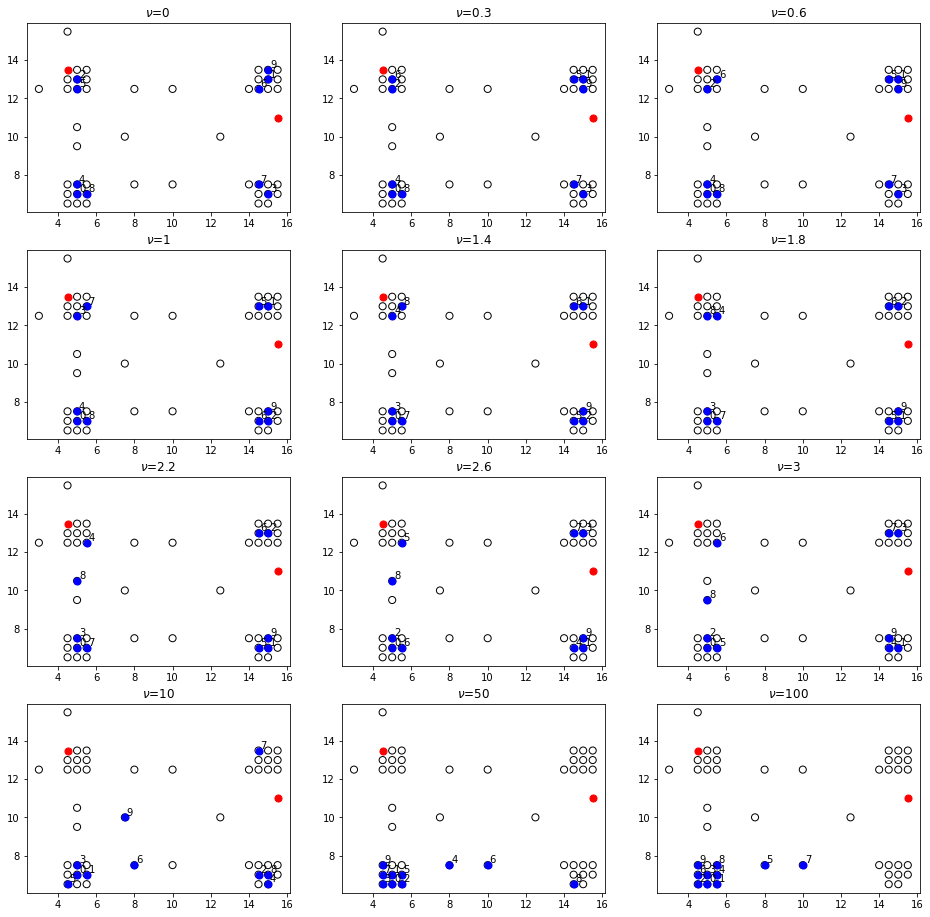

In [15]:
from submodlib import GraphCutConditionalGainFunction

nus = [0, 0.3, 0.6, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for nu in nus:
    plt.subplot(4,3,row*3+index)
    obj = GraphCutConditionalGainFunction(n=46, 
                                          num_privates=2, 
                                          lambdaVal=1, 
                                          data=groundData,
                                          privateData=mutlipleQueryData2,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

## $\lambda=5$

### Single Private

[(25, 3.494), (10, 3.351), (7, 2.837), (28, 2.121), (35, -2.677), (36, -4.118), (43, -4.628), (30, -6.418), (5, -6.477), (0, -7.153)]
[(25, 3.379), (10, 3.335), (28, 2.144), (13, 0.909), (38, -3.185), (37, -4.048), (43, -5.122), (44, -5.641), (41, -6.104), (42, -7.243)]
[(10, 3.349), (25, 3.235), (28, 2.137), (14, -0.609), (38, -3.291), (37, -4.464), (44, -5.503), (41, -6.092), (43, -6.659), (42, -7.268)]
[(10, 3.328), (25, 3.081), (28, 2.129), (35, -2.256), (36, -4.068), (14, -4.842), (5, -6.479), (30, -6.717), (33, -7.529), (43, -7.73)]
[(10, 3.307), (25, 2.927), (28, 2.121), (35, -2.655), (36, -4.119), (44, -6.192), (5, -6.466), (38, -7.344), (43, -7.591), (33, -8.504)]
[(10, 3.286), (25, 2.774), (28, 2.112), (35, -3.054), (36, -4.17), (5, -6.446), (30, -6.481), (38, -7.346), (37, -8.34), (33, -8.735)]
[(10, 3.266), (25, 2.62), (28, 2.104), (38, -3.218), (37, -4.388), (44, -5.449), (41, -6.084), (42, -7.234), (30, -8.551), (43, -10.619)]
[(10, 3.245), (25, 2.467), (28, 2.096), (38, 

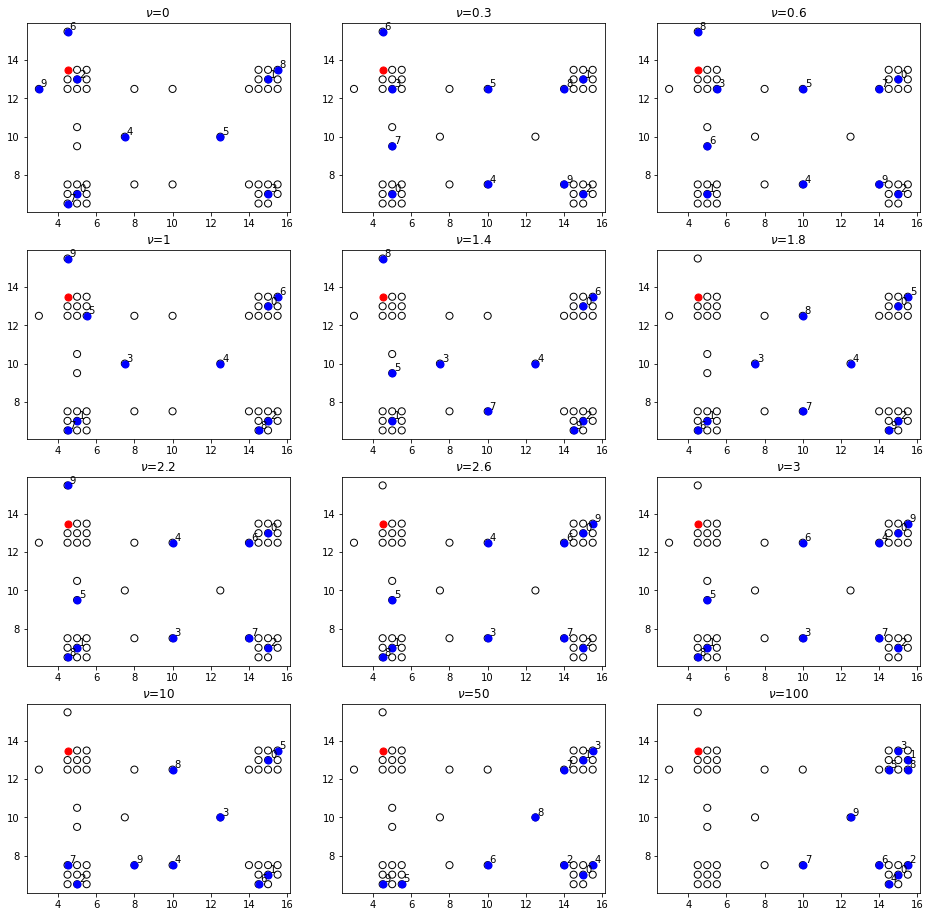

In [17]:
from submodlib import GraphCutConditionalGainFunction

nus = [0, 0.3, 0.6, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for nu in nus:
    plt.subplot(4,3,row*3+index)
    obj = GraphCutConditionalGainFunction(n=46, 
                                          num_privates=1, 
                                          lambdaVal=5, 
                                          data=groundData,
                                          privateData=singleQueryData,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(singlequeryxs, singlequeryys, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

### Multiple Privates (1)

[(25, 3.494), (10, 3.351), (7, 2.837), (28, 2.121), (35, -2.677), (36, -4.118), (43, -4.628), (30, -6.418), (5, -6.477), (0, -7.153)]
[(25, 3.364), (10, 3.22), (13, 0.935), (21, 0.353), (35, -3.37), (41, -4.831), (43, -5.12), (38, -5.804), (30, -7.164), (37, -7.869)]
[(25, 3.233), (10, 3.089), (14, -0.585), (21, -1.146), (40, -3.649), (37, -4.526), (43, -6.157), (41, -6.34), (44, -7.099), (33, -9.493)]
[(25, 3.058), (10, 2.915), (35, -2.207), (42, -3.159), (14, -4.659), (41, -5.25), (38, -6.628), (30, -7.296), (43, -7.766), (37, -8.711)]
[(25, 2.884), (10, 2.74), (35, -2.657), (36, -4.097), (44, -6.194), (5, -6.505), (38, -7.389), (43, -7.591), (37, -8.898), (21, -9.289)]
[(25, 2.709), (10, 2.566), (35, -3.106), (36, -4.547), (30, -6.488), (5, -6.62), (37, -7.583), (38, -8.456), (43, -9.121), (45, -10.528)]
[(25, 2.535), (10, 2.391), (40, -3.511), (37, -4.377), (41, -6.179), (44, -6.543), (36, -9.206), (30, -9.64), (43, -10.732), (5, -11.457)]
[(25, 2.36), (10, 2.217), (40, -3.726), (3

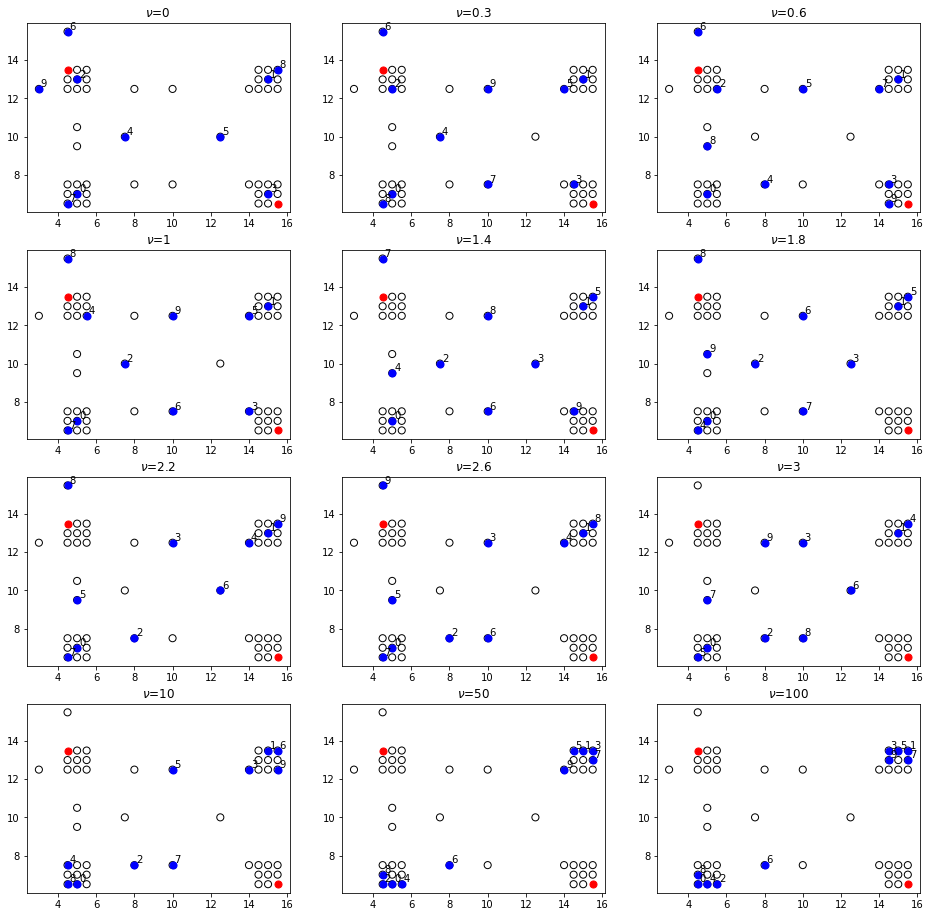

In [18]:
from submodlib import GraphCutConditionalGainFunction

nus = [0, 0.3, 0.6, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for nu in nus:
    plt.subplot(4,3,row*3+index)
    obj = GraphCutConditionalGainFunction(n=46, 
                                          num_privates=2, 
                                          lambdaVal=5, 
                                          data=groundData,
                                          privateData=mutlipleQueryData,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

### Multiple Privates (2)

[(25, 3.494), (10, 3.351), (7, 2.837), (28, 2.121), (35, -2.677), (36, -4.118), (43, -4.628), (30, -6.418), (5, -6.477), (0, -7.153)]
[(25, 3.368), (10, 2.265), (28, 1.744), (13, 0.894), (38, -3.301), (37, -4.221), (43, -5.13), (44, -5.656), (42, -6.869), (5, -7.48)]
[(25, 3.242), (28, 1.836), (10, 0.681), (14, -0.647), (40, -3.52), (37, -4.667), (43, -6.163), (42, -6.386), (44, -7.096), (5, -8.278)]
[(25, 3.074), (28, 1.295), (4, -0.539), (45, -2.38), (38, -3.897), (37, -4.88), (43, -6.351), (30, -7.349), (42, -7.817), (41, -9.597)]
[(25, 2.906), (28, 0.753), (3, -1.652), (35, -2.927), (38, -5.319), (37, -6.603), (30, -7.039), (43, -7.583), (33, -8.429), (45, -9.504)]
[(25, 2.738), (28, 0.212), (3, -2.72), (35, -3.397), (38, -5.541), (30, -6.999), (37, -7.249), (33, -8.825), (43, -9.077), (45, -10.4)]
[(25, 2.57), (27, -0.31), (40, -3.629), (3, -3.912), (37, -5.746), (44, -6.553), (29, -7.987), (30, -9.554), (43, -10.665), (38, -10.782)]
[(25, 2.401), (33, -0.817), (40, -3.806), (3, -

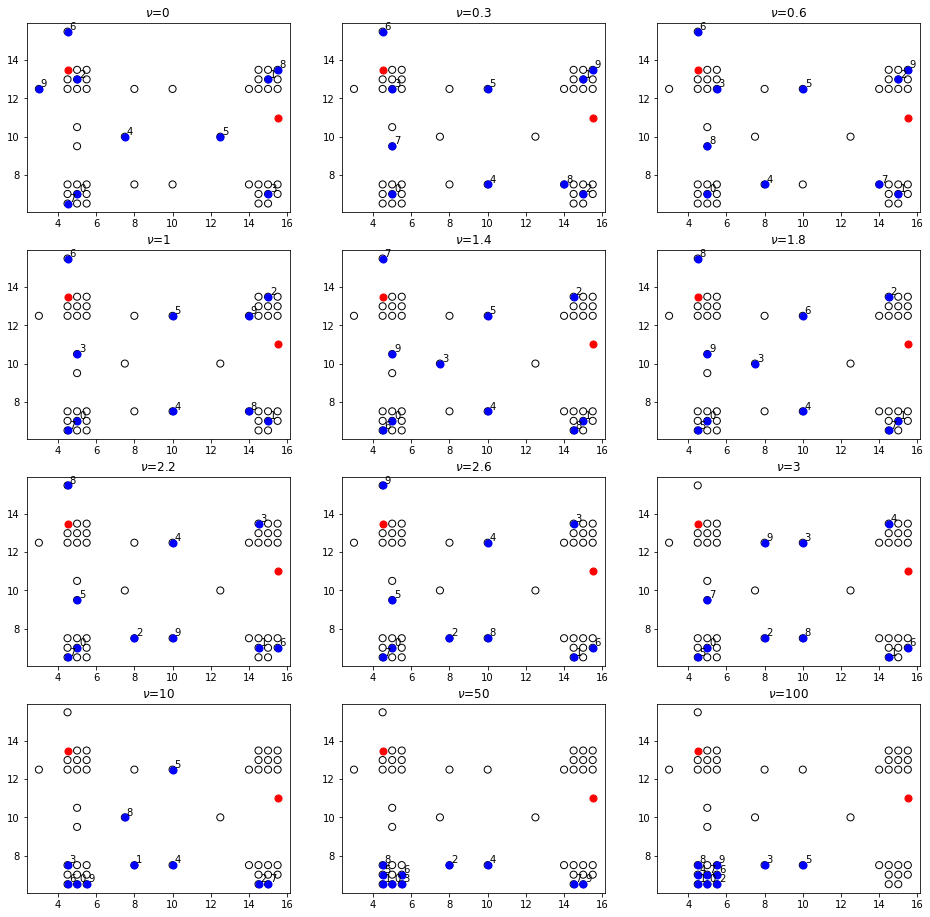

In [19]:
from submodlib import GraphCutConditionalGainFunction

nus = [0, 0.3, 0.6, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for nu in nus:
    plt.subplot(4,3,row*3+index)
    obj = GraphCutConditionalGainFunction(n=46, 
                                          num_privates=2, 
                                          lambdaVal=5, 
                                          data=groundData,
                                          privateData=mutlipleQueryData2,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

# Selection by FacilityLocationConditionalGain Function (FLCG)

## Single Private

[(25, 8.494), (10, 8.054), (7, 6.662), (28, 6.317), (40, 1.206), (37, 1.097), (45, 1.034), (36, 0.829), (43, 0.721), (35, 0.721)]
[(10, 8.172), (25, 7.549), (28, 6.317), (7, 5.376), (40, 1.206), (37, 1.097), (45, 1.034), (36, 0.829), (43, 0.721), (35, 0.721)]
[(10, 8.119), (25, 7.302), (28, 6.317), (7, 3.562), (40, 1.206), (37, 1.097), (45, 1.034), (36, 0.829), (43, 0.721), (35, 0.721)]
[(10, 8.052), (25, 7.013), (28, 6.317), (13, 1.334), (40, 1.177), (37, 1.091), (45, 0.952), (36, 0.829), (35, 0.721), (43, 0.632)]
[(10, 7.989), (25, 6.767), (28, 6.317), (40, 1.206), (37, 1.084), (45, 1.014), (36, 0.829), (35, 0.721), (39, 0.632), (38, 0.632)]
[(10, 7.952), (25, 6.553), (28, 6.317), (40, 1.168), (37, 0.995), (45, 0.927), (36, 0.829), (35, 0.721), (39, 0.632), (38, 0.632)]
[(10, 7.916), (28, 6.36), (25, 6.303), (40, 1.128), (37, 0.906), (44, 0.833), (36, 0.829), (35, 0.721), (39, 0.632), (38, 0.632)]
[(10, 7.88), (28, 6.353), (25, 6.15), (38, 1.097), (37, 0.841), (36, 0.829), (35, 0.741

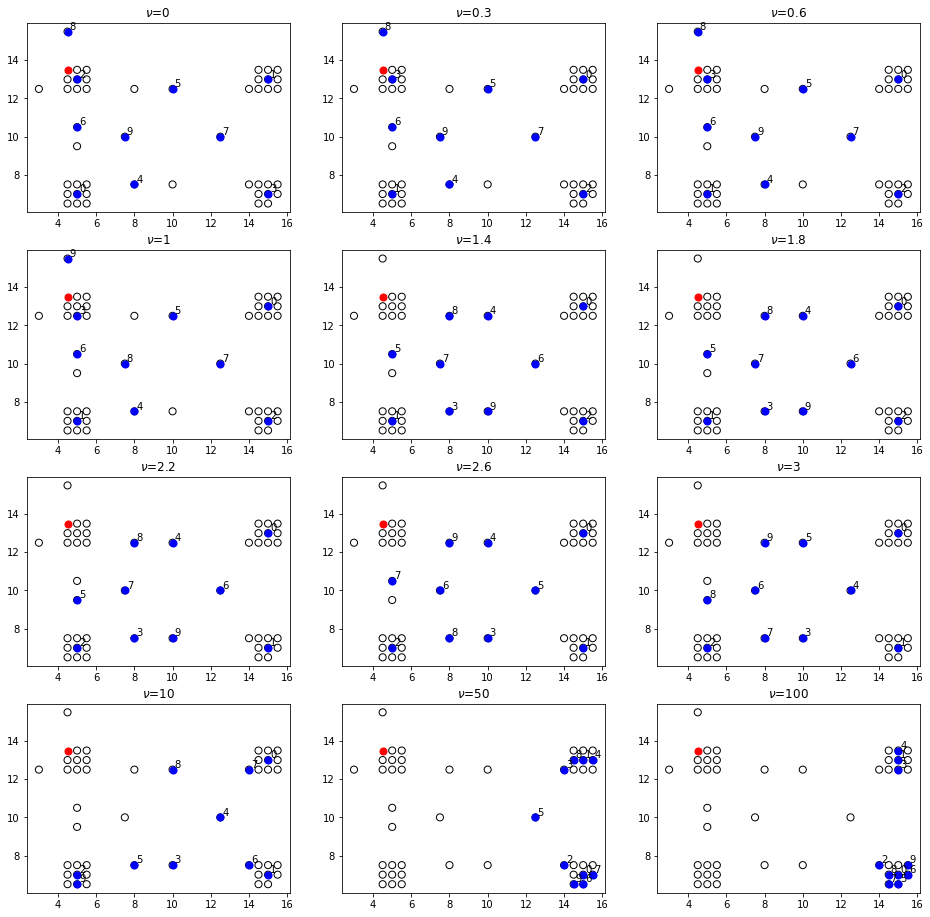

In [21]:
from submodlib import FacilityLocationConditionalGainFunction

nus = [0, 0.3, 0.6, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for nu in nus:
    plt.subplot(4,3,row*3+index)
    obj = FacilityLocationConditionalGainFunction(n=46, 
                                          num_privates=1, 
                                          data=groundData,
                                          privateData=singleQueryData,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(singlequeryxs, singlequeryys, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

## Multiple Privates (1)

[(25, 8.494), (10, 8.054), (7, 6.662), (28, 6.317), (40, 1.206), (37, 1.097), (45, 1.034), (36, 0.829), (43, 0.721), (35, 0.721)]
[(25, 7.563), (10, 7.546), (7, 5.376), (28, 5.139), (40, 1.206), (37, 1.097), (45, 1.034), (36, 0.829), (43, 0.721), (35, 0.721)]
[(10, 7.385), (25, 7.289), (7, 3.562), (28, 3.484), (40, 1.206), (37, 1.097), (45, 1.034), (36, 0.829), (43, 0.721), (35, 0.721)]
[(10, 7.162), (25, 6.976), (27, 1.435), (13, 1.334), (39, 1.171), (38, 1.051), (45, 0.952), (36, 0.829), (35, 0.721), (43, 0.632)]
[(10, 6.944), (25, 6.71), (40, 1.201), (37, 1.084), (45, 1.014), (36, 0.829), (35, 0.721), (39, 0.632), (38, 0.632), (42, 0.52)]
[(10, 6.783), (25, 6.502), (40, 1.139), (39, 0.966), (45, 0.927), (36, 0.82), (35, 0.721), (38, 0.632), (37, 0.632), (41, 0.505)]
[(10, 6.625), (25, 6.303), (40, 1.075), (39, 0.877), (44, 0.833), (36, 0.781), (35, 0.721), (38, 0.632), (37, 0.632), (41, 0.505)]
[(10, 6.466), (25, 6.15), (40, 1.011), (37, 0.841), (36, 0.741), (35, 0.721), (45, 0.692)

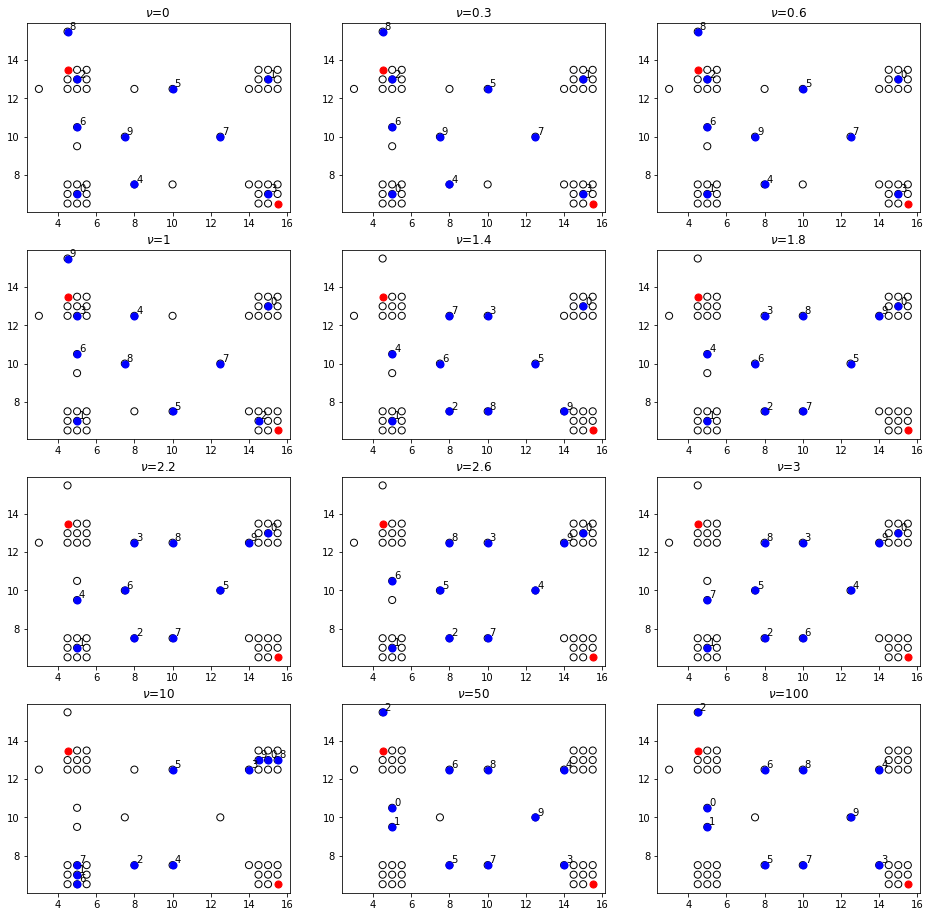

In [22]:
from submodlib import FacilityLocationConditionalGainFunction

nus = [0, 0.3, 0.6, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for nu in nus:
    plt.subplot(4,3,row*3+index)
    obj = FacilityLocationConditionalGainFunction(n=46, 
                                          num_privates=2, 
                                          data=groundData,
                                          privateData=mutlipleQueryData,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

## Multiple Privates (2)

[(25, 8.494), (10, 8.054), (7, 6.662), (28, 6.317), (40, 1.206), (37, 1.097), (45, 1.034), (36, 0.829), (43, 0.721), (35, 0.721)]
[(25, 7.57), (10, 6.666), (28, 6.317), (7, 5.376), (40, 1.206), (37, 1.097), (45, 1.034), (36, 0.829), (43, 0.721), (35, 0.721)]
[(25, 7.303), (28, 6.059), (10, 5.407), (7, 3.562), (40, 1.206), (37, 1.097), (45, 1.034), (36, 0.829), (43, 0.721), (35, 0.721)]
[(25, 6.999), (28, 5.538), (10, 3.96), (13, 1.334), (40, 1.177), (39, 1.063), (45, 0.952), (36, 0.794), (35, 0.721), (43, 0.632)]
[(25, 6.738), (28, 5.036), (10, 2.517), (40, 1.206), (37, 1.055), (45, 1.014), (35, 0.721), (36, 0.712), (39, 0.632), (38, 0.632)]
[(25, 6.514), (28, 4.534), (10, 1.361), (40, 1.168), (39, 0.966), (45, 0.927), (35, 0.721), (38, 0.632), (37, 0.632), (36, 0.63)]
[(25, 6.303), (28, 4.032), (40, 1.125), (39, 0.877), (44, 0.833), (4, 0.74), (35, 0.721), (38, 0.632), (37, 0.632), (36, 0.547)]
[(25, 6.15), (28, 3.53), (40, 1.07), (37, 0.841), (35, 0.721), (45, 0.692), (38, 0.632), (3

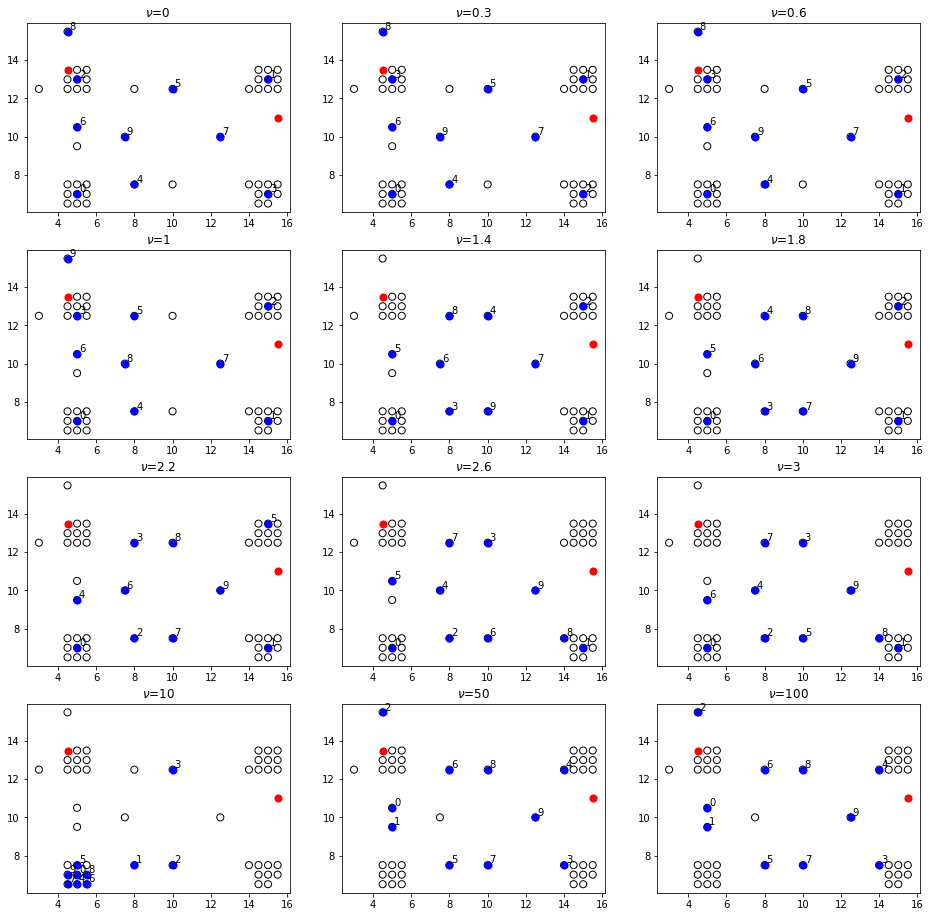

In [23]:
from submodlib import FacilityLocationConditionalGainFunction

nus = [0, 0.3, 0.6, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for nu in nus:
    plt.subplot(4,3,row*3+index)
    obj = FacilityLocationConditionalGainFunction(n=46, 
                                          num_privates=2, 
                                          data=groundData,
                                          privateData=mutlipleQueryData2,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

# Selection by LogDeterminantConditionalGain Function (LogDetCG)

## Single Private

[(45, 0.693), (29, 0.693), (3, 0.693), (43, 0.691), (38, 0.691), (30, 0.688), (37, 0.687), (36, 0.672), (0, 0.67), (35, 0.658)]
[(29, 0.693), (30, 0.693), (37, 0.693), (5, 0.692), (43, 0.69), (38, 0.69), (45, 0.685), (36, 0.674), (0, 0.667), (35, 0.658)]
[(29, 0.693), (30, 0.693), (3, 0.693), (38, 0.691), (39, 0.689), (43, 0.679), (36, 0.677), (45, 0.677), (0, 0.658), (37, 0.649)]
[(29, 0.693), (32, 0.693), (3, 0.693), (37, 0.69), (38, 0.688), (44, 0.676), (36, 0.672), (43, 0.658), (35, 0.656), (0, 0.642)]
[(29, 0.693), (3, 0.693), (32, 0.693), (38, 0.689), (37, 0.687), (36, 0.672), (44, 0.671), (35, 0.655), (39, 0.631), (17, 0.626)]
[(29, 0.693), (3, 0.693), (32, 0.692), (38, 0.689), (37, 0.686), (36, 0.672), (35, 0.667), (44, 0.651), (17, 0.626), (40, 0.626)]
[(29, 0.693), (5, 0.693), (32, 0.692), (38, 0.689), (37, 0.686), (36, 0.674), (35, 0.664), (44, 0.645), (41, 0.636), (40, 0.626)]
[(29, 0.693), (5, 0.693), (32, 0.692), (38, 0.689), (37, 0.684), (36, 0.674), (35, 0.66), (44, 0.6

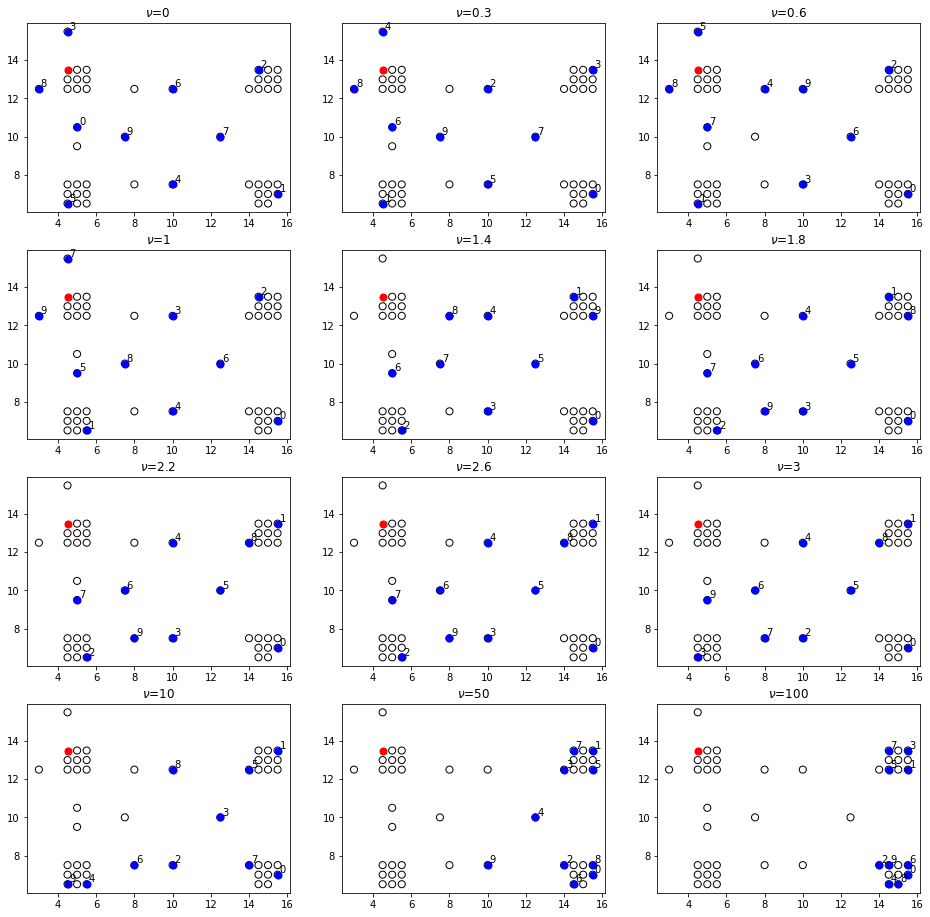

In [24]:
from submodlib import LogDeterminantConditionalGainFunction

nus = [0, 0.3, 0.6, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for nu in nus:
    plt.subplot(4,3,row*3+index)
    obj = LogDeterminantConditionalGainFunction(n=46, 
                                          num_privates=1, 
                                          lambdaVal=1,
                                          data=groundData,
                                          privateData=singleQueryData,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(singlequeryxs, singlequeryys, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

## Multiple Privates (1)

[(45, 0.693), (29, 0.693), (3, 0.693), (43, 0.691), (38, 0.691), (30, 0.688), (37, 0.687), (36, 0.672), (0, 0.67), (35, 0.658)]
[(3, 0.693), (30, 0.693), (38, 0.692), (39, 0.691), (43, 0.688), (21, 0.684), (0, 0.679), (36, 0.671), (44, 0.67), (37, 0.649)]
[(32, 0.693), (3, 0.693), (37, 0.69), (38, 0.689), (45, 0.683), (43, 0.679), (36, 0.674), (42, 0.662), (0, 0.659), (35, 0.656)]
[(32, 0.693), (3, 0.693), (37, 0.69), (38, 0.688), (44, 0.676), (36, 0.673), (43, 0.658), (35, 0.656), (0, 0.642), (42, 0.636)]
[(32, 0.693), (3, 0.693), (38, 0.689), (37, 0.687), (44, 0.671), (36, 0.671), (35, 0.655), (39, 0.631), (17, 0.626), (40, 0.626)]
[(32, 0.692), (3, 0.692), (37, 0.687), (38, 0.686), (35, 0.668), (36, 0.667), (44, 0.651), (17, 0.626), (40, 0.626), (39, 0.624)]
[(3, 0.692), (32, 0.692), (38, 0.686), (37, 0.684), (36, 0.665), (35, 0.664), (44, 0.645), (40, 0.626), (17, 0.625), (39, 0.616)]
[(32, 0.692), (3, 0.692), (38, 0.684), (37, 0.683), (35, 0.66), (36, 0.66), (44, 0.638), (40, 0.62

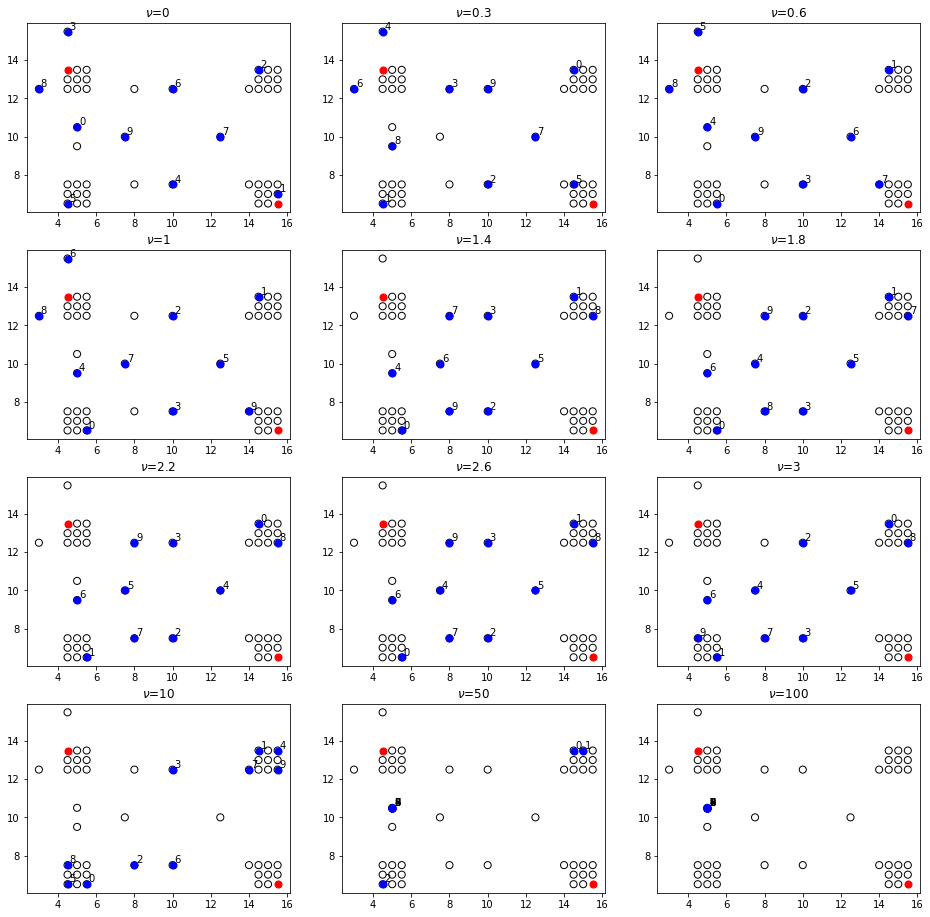

In [25]:
from submodlib import LogDeterminantConditionalGainFunction

nus = [0, 0.3, 0.6, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for nu in nus:
    plt.subplot(4,3,row*3+index)
    obj = LogDeterminantConditionalGainFunction(n=46, 
                                          num_privates=2, 
                                          lambdaVal=1,
                                          data=groundData,
                                          privateData=mutlipleQueryData,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

## Multiple Privates (2)

[(45, 0.693), (29, 0.693), (3, 0.693), (43, 0.691), (38, 0.691), (30, 0.688), (37, 0.687), (36, 0.672), (0, 0.67), (35, 0.658)]
[(32, 0.693), (33, 0.693), (37, 0.693), (5, 0.69), (43, 0.69), (38, 0.687), (45, 0.685), (36, 0.672), (0, 0.667), (35, 0.656)]
[(32, 0.693), (37, 0.692), (33, 0.692), (38, 0.686), (5, 0.685), (45, 0.683), (43, 0.679), (36, 0.67), (0, 0.659), (35, 0.656)]
[(32, 0.693), (37, 0.691), (33, 0.691), (38, 0.686), (44, 0.676), (3, 0.674), (36, 0.663), (43, 0.658), (35, 0.656), (0, 0.642)]
[(32, 0.693), (38, 0.69), (37, 0.688), (34, 0.686), (44, 0.671), (3, 0.657), (36, 0.656), (35, 0.654), (39, 0.631), (40, 0.626)]
[(32, 0.692), (38, 0.689), (37, 0.686), (34, 0.683), (35, 0.668), (44, 0.651), (36, 0.644), (3, 0.635), (40, 0.626), (39, 0.624)]
[(32, 0.692), (38, 0.689), (37, 0.683), (33, 0.679), (35, 0.665), (44, 0.645), (36, 0.627), (40, 0.626), (39, 0.616), (3, 0.606)]
[(32, 0.692), (38, 0.688), (37, 0.68), (33, 0.674), (35, 0.66), (44, 0.638), (40, 0.626), (36, 0.60

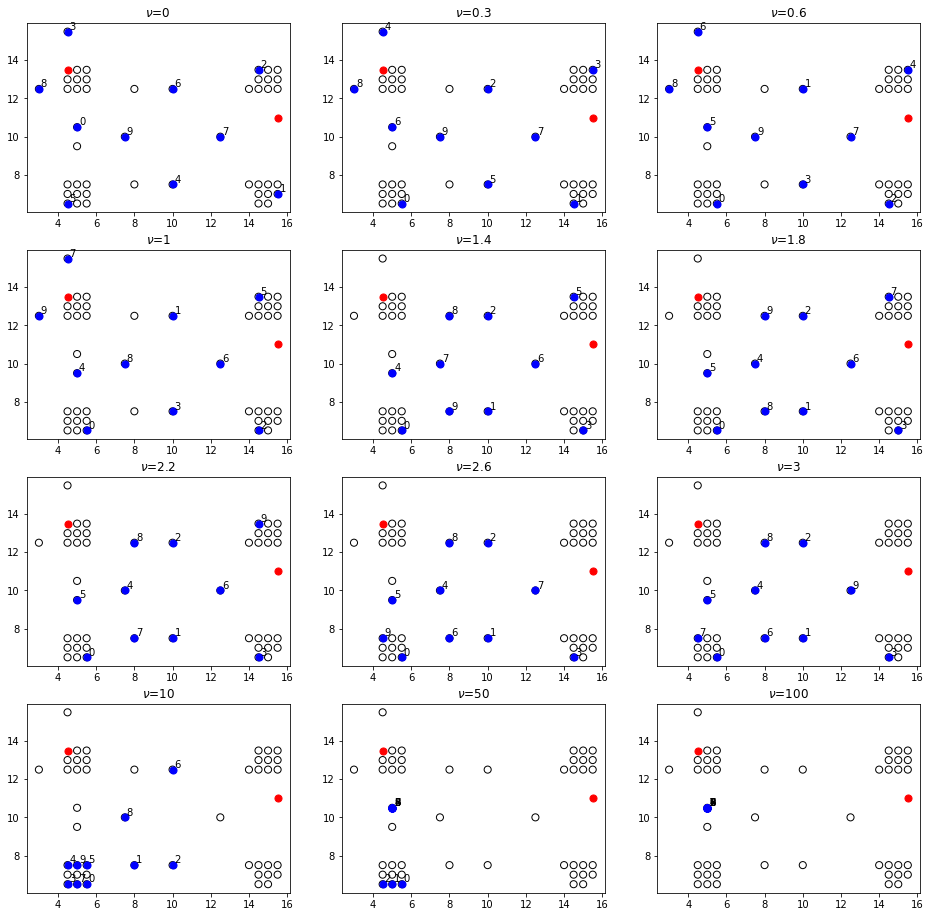

In [26]:
from submodlib import LogDeterminantConditionalGainFunction

nus = [0, 0.3, 0.6, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for nu in nus:
    plt.subplot(4,3,row*3+index)
    obj = LogDeterminantConditionalGainFunction(n=46, 
                                          num_privates=2,
                                          lambdaVal=1,
                                          data=groundData,
                                          privateData=mutlipleQueryData2,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

# Selection by ProbabilisticSetCoverConditionalGain Function

In [27]:
import numpy as np
import random
from submodlib import ProbabilisticSetCoverConditionalGainFunction
num_concepts = 10
num_samples = 10
budget = 4
probs = []
np.random.seed(1)
random.seed(1)
#concept_weights = np.random.rand(num_concepts).tolist()
printables = []
for i in range(num_samples):
    probs.append([round(num, 2) for num in np.random.rand(num_concepts).tolist()])
privates = set(random.sample(range(num_concepts),2))
print("Private concepts: ", privates)
obj = ProbabilisticSetCoverConditionalGainFunction(n=num_samples, probs=probs, 
                                                   num_concepts=num_concepts, private_concepts=privates)
greedyList = obj.maximize(budget=budget, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyIndices = [x[0] for x in greedyList]
for i in range(num_samples):
    if i in greedyIndices:
        print(i, ": ", probs[i], "\u2713")
    else:
        print(i, ": ", probs[i])
print("Greedy Ordered List: ", greedyList)
greedyProbs = []
for i in range(num_concepts):
    product = 1
    for elem in greedyIndices:
        product = product * (1-probs[elem][i])
    greedyProbs.append(round(1-product, 2))
print("Probabilities of concepts covered by greedy set: ", greedyProbs)

Private concepts:  {1, 2}
0 :  [0.42, 0.72, 0.0, 0.3, 0.15, 0.09, 0.19, 0.35, 0.4, 0.54]
1 :  [0.42, 0.69, 0.2, 0.88, 0.03, 0.67, 0.42, 0.56, 0.14, 0.2]
2 :  [0.8, 0.97, 0.31, 0.69, 0.88, 0.89, 0.09, 0.04, 0.17, 0.88] ✓
3 :  [0.1, 0.42, 0.96, 0.53, 0.69, 0.32, 0.69, 0.83, 0.02, 0.75]
4 :  [0.99, 0.75, 0.28, 0.79, 0.1, 0.45, 0.91, 0.29, 0.29, 0.13]
5 :  [0.02, 0.68, 0.21, 0.27, 0.49, 0.05, 0.57, 0.15, 0.59, 0.7]
6 :  [0.1, 0.41, 0.69, 0.41, 0.05, 0.54, 0.66, 0.51, 0.94, 0.59] ✓
7 :  [0.9, 0.14, 0.14, 0.81, 0.4, 0.17, 0.93, 0.35, 0.75, 0.73] ✓
8 :  [0.88, 0.62, 0.75, 0.35, 0.27, 0.9, 0.43, 0.96, 0.66, 0.62] ✓
9 :  [0.11, 0.95, 0.45, 0.58, 0.41, 0.24, 0.9, 0.57, 0.0, 0.62]
Greedy Ordered List:  [(8, 5.069999992847443), (7, 2.019999988675117), (2, 0.6634940278257131), (6, 0.13376966740467172)]
Probabilities of concepts covered by greedy set:  [1.0, 0.99, 0.95, 0.98, 0.95, 1.0, 0.99, 0.99, 1.0, 0.99]


# Selection by Set Cover Conditional Gain Function

In [28]:
import numpy as np
import random
from submodlib import SetCoverConditionalGainFunction
num_concepts = 20
num_samples = 15
budget = 4
cover_set = []
np.random.seed(1)
random.seed(1)
#concept_weights = np.random.rand(num_concepts).tolist()
printables = []
for i in range(num_samples):
    cover_set.append(set(random.sample(list(range(num_concepts)), random.randint(0,num_concepts/2))))
    printable = ["\u25A1"]*num_concepts
    #print(''.join(map(str, temp)))
    for ind, val in enumerate(printable):
        if ind in cover_set[i]:
            printable[ind] = "\u25A0"
    #print(i, ": ", ''.join(map(str, printable)))
    printables.append(printable)
    #printable = ["\u25A0" if index in cover_set[i] for index, val in enumerate(temp)]
privates = set(random.sample(range(num_concepts),2))
print("Private set: ", privates)
obj = SetCoverConditionalGainFunction(n=num_samples, cover_set=cover_set, 
                                        num_concepts=num_concepts, private_concepts=privates)
greedyList = obj.maximize(budget=budget, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyIndices = [x[0] for x in greedyList]
for i in range(num_samples):
    if i in greedyIndices:
        print(i, ": ", ''.join(map(str, printables[i])), f"({len(cover_set[i])})", "\u2713")
    else:
        print(i, ": ", ''.join(map(str, printables[i])), f"({len(cover_set[i])})")
print("Greedy Ordered List: ", greedyList)
greedyConcepts = set()
for elem in greedyIndices:
    greedyConcepts = greedyConcepts.union(cover_set[elem])
print("Concepts Covered by Greedy Set: ", greedyConcepts)
greedyPrintable = ["\u25A1"]*num_concepts
for ind, val in enumerate(greedyPrintable):
    if ind in greedyConcepts:
        greedyPrintable[ind] = "\u25A0"
print("Concepts Covered by Greedy Set: ", ''.join(map(str, greedyPrintable)))

Private set:  {0, 6}
0 :  □□■□□□□□□□□□□□□□□□■□ (2)
1 :  □□□■□□□□□□□□□□■■□□■□ (4)
2 :  ■□□■□□■□□■□□■■■■□□■■ (10)
3 :  □□□□□□□□□□□□□□□□□□□□ (0)
4 :  ■□□■□□□■■□■□□□■■□□□□ (7)
5 :  ■□□■□□■■■□□■■■□□□■■□ (10)
6 :  □□□□□□□■□□□■■□□■■■■□ (7)
7 :  ■□□■□□□□□□□□□■□□□■□□ (4) ✓
8 :  □□□■□□□□□■□□□□□□□□□□ (2)
9 :  □□□□□□■□□■□□□■□□■□□■ (5) ✓
10 :  □□□□□□□□□□□□■□□■■□■□ (4)
11 :  □■■□□■□■■□■□■■□■□□□□ (9) ✓
12 :  □□■■□■■□■□□■■□■□■□■□ (10) ✓
13 :  ■■■□□□□□□■■□■□□■□□□□ (7)
14 :  □□□□□□□■□□□□□□□□■□□□ (2)
Greedy Ordered List:  [(12, 9.0), (11, 5.0), (9, 2.0), (7, 1.0)]
Concepts Covered by Greedy Set:  {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
Concepts Covered by Greedy Set:  ■■■■□■■■■■■■■■■■■■■■
